#### **Welcome to Assignment 1 on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement basic Image processing tasks like Correlation, Convolution, Edge Detection etc.

#### **Instructions**
1. Use Python 3.x to run this notebook
3. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
4. Read documentation of each function carefully.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [2]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

In [3]:
def standardize(image):
    eps = 1e-5  # some fields have all 255 so variance will be 0, to avoid division by zero, introduced eps
    return (image - np.mean(image))/(np.std(image)+eps)

### Question 1


In [4]:
# Implement Linear Filtering technique on an image using a linear filter
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    #print(image_height, image_width)
    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    print(result_height,result_width)
    #print(filter_width,filter_height)
    for i in range(result_height):
        for j in range(result_width):
         # YOUR CODE STARTS HERE
            receptive_field=image[i:i+filter_height,j:j+filter_width]
            receptive_field=standardize(receptive_field)
            result[i,j] = (np.sum(np.multiply(receptive_field,filter_)))
            
         # YOUR CODE ENDS HERE
            
    return result
    

In [5]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')
result = linear_filter(image, filter_)

216 282


In [6]:
ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
print(ind,result.shape)

(143, 49) (216, 282)


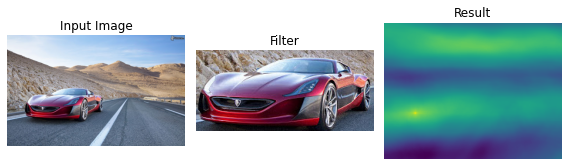

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(filter_)
ax[1].set_title('Filter')

ax[2].imshow(result)
ax[2].set_title('Result')


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Where do you find the bright spot in the `result` image? (*Hint:* Find the co-ordinates of the maximum value in the output array, you can use `unravel_index` function from `numpy`)

1. $(143, 49)$
2. $(134, 47)$
3. $(130, 33)$
4. $(126, 50)$

### Question 2

In [8]:
# To test your implementation, run the below code.
image = Image.open('./images/hills.jpeg')
filter_ = Image.open('./images/template.png')
result = linear_filter(image, filter_)

100 142


In [9]:
ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
print(ind,result.shape)

(0, 137) (100, 142)


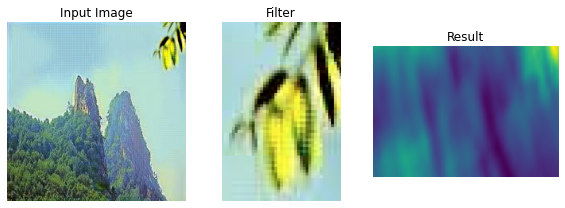

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(filter_)
ax[1].set_title('Filter')

ax[2].imshow(result)
ax[2].set_title('Result')


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Where do you find the bright spot in the `result` image? (*Hint:* Find the co-ordinates of the maximum value in the output array  )
​
1. $(2, 130)$
2. $(25, 118)$
3. $(0, 137)$
4. $(42, 115)$

### Question 3

In [24]:
# Implement Convolution on an image using a filter/kernel
def convolution2D(image, kernel):
    """
    Performs convolution on an image using a kernel.
    
    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # YOUR CODE STARTS HERE
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    #print(image_height, image_width)
    kernel = np.array(kernel.convert('L'))
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]
    kernel=np.rot90(kernel,2)
    
    result_height, result_width = (image_height - kernel_height) + 1, (image_width - kernel_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    #print(result_height,result_width)
    #print(filter_width,filter_height)
    for i in range(result_height):
        for j in range(result_width):
         # YOUR CODE STARTS HERE
            receptive_field=image[i:i+kernel_height,j:j+kernel_width]
            receptive_field= standardize(receptive_field)
            result[i,j] = (np.sum(np.multiply(receptive_field,kernel)))
    # YOUR CODE ENDS HERE
    return result

In [16]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')
result = convolution2D(image, filter_)

In [17]:
ind_max = np.unravel_index(np.argmax(result, axis=None), result.shape)
ind_min = np.unravel_index(np.argmin(result, axis=None), result.shape)
print(ind_max,ind_min)

(215, 61) (38, 142)


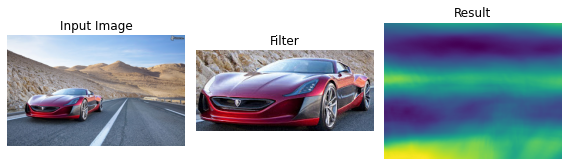

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(filter_)
ax[1].set_title('Filter')

ax[2].imshow(result)
ax[2].set_title('Result')


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `result` image?

1. $(43, 134), (200, 54)$
2. $(38, 142), (215, 61)$
3. $(30, 118), (198, 54)$
4. $(44, 142), (220, 43)$

### Question 4

In [19]:
# To test your implementation, run the below code.
image = Image.open('./images/hills.jpeg')
filter_ = Image.open('./images/template.png')
result = convolution2D(image, filter_)

In [20]:
ind_max = np.unravel_index(np.argmax(result, axis=None), result.shape)
ind_min = np.unravel_index(np.argmin(result, axis=None), result.shape)
print(ind_max,ind_min)

(22, 98) (0, 27)


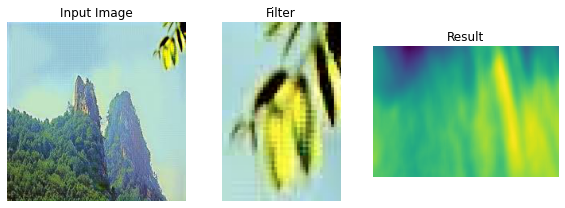

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
ax[0].imshow(image)
ax[0].set_title('Input Image')

ax[1].imshow(filter_)
ax[1].set_title('Filter')

ax[2].imshow(result)
ax[2].set_title('Result')


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `result` image?

1. $(15, 28), (18, 89)$
2. $(0, 27), (22, 98)$
3. $(4, 17), (14, 70)$
4. $(7, 42), (10, 89)$

### Question 5: 
In this question you'll have to apply a Sobel Filter to the provided image and report the index of min and max value of the final output.


In [41]:
# Implement Convolution on an image using a filter/kernel
def convolution_2D(image, kernel):
    """
    Performs convolution on an image using a kernel.
    
    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # YOUR CODE STARTS HERE
    #image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    #print(image_height, image_width)
    #kernel = np.array(kernel.convert('L'))
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]
    kernel=np.rot90(kernel,2)
    
    result_height, result_width = (image_height - kernel_height) + 1, (image_width - kernel_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    #print(result_height,result_width)
    #print(filter_width,filter_height)
    for i in range(result_height):
        for j in range(result_width):
         # YOUR CODE STARTS HERE
            receptive_field=image[i:i+kernel_height,j:j+kernel_width]
            receptive_field= standardize(receptive_field)
            result[i,j] = (np.sum(np.multiply(receptive_field,kernel)))
    # YOUR CODE ENDS HERE
    return result

In [49]:
image = np.array(Image.open('./images/edges_image.png').convert('L'))

###YOUR CODE STARTS HERE

# Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
sobel_v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

#Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
sobel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

#compute vertical response using convolution2D function
response_v = convolution_2D(image, sobel_v)

#compute horizontal response using convolution2D function
response_h  = convolution_2D(image, sobel_h)

#compute final response
# G = |G_x| + |G_y|
G = np.abs(response_h) + np.abs(response_v)

#compute index of min and max value of G
ind_max = np.unravel_index(np.argmax(G, axis=None), G.shape)
ind_min = np.unravel_index(np.argmin(G, axis=None), G.shape)
print(ind_min,ind_max)

###YOUR CODE ENDS HERE

(0, 0) (111, 16)


In [48]:
print(G[0,0],G[56,152],G[52,147],G[51,143])
print(G[108,107],G[116,18],G[111,26],G[114,24])
print(G[111,16])

0.0 0.0 5.5 0.0
6.0 0.0 0.0 0.0
7.0


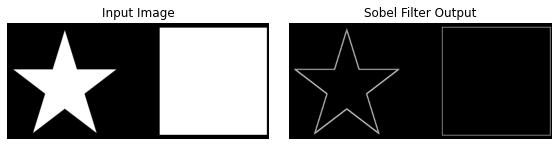

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(G, cmap='gray')
ax[1].set_title('Sobel Filter Output')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `G` image?

1. $(52, 147), (111, 26)$
2. $(0, 0), (108, 107)$
3. $(56, 152), (116, 18)$
4. $(51, 143), (114, 24)$

### Question 6

In this question you'll have to apply a Laplace Filter to the provided image and report the index of min and max value of the final output.

What are index of the min and max values of the Laplace Filter response to the provided image?



In [51]:
image = np.array(Image.open('./images/edges_image.png').convert('L'))

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

#compute response using convolution2D function
response_L = convolution_2D(image, laplacian_filter)

#compute index of min and max value of Laplace Filter response
ind_max = np.unravel_index(np.argmax(response_L, axis=None), response_L.shape)
ind_min = np.unravel_index(np.argmin(response_L, axis=None), response_L.shape)
print(ind_min,ind_max)
###YOUR CODE ENDS HERE

(203, 136) (17, 136)


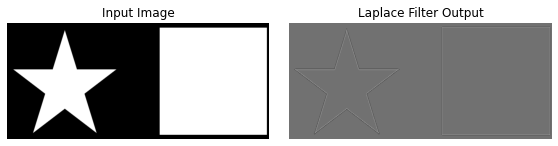

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(response_L, cmap='gray')
ax[1].set_title('Laplace Filter Output')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `response_L` image?

1. $(4, 117), (111, 26)$
2. $(49, 176), (110, 27)$
3. $(203, 136), (17, 136)$
4. $(10, 104), (106, 22)$

## Optional (un-graded)

Implement Canny-edge detector and compare it's output with the outputs of sobel and Laplace filters. You can use `skimage` library to implement it easily

In [ ]:
image = Image.open('./images/edges_image.png').convert('L')

image = np.array(image)


###YOUR CODE STARTS HERE

###YOUR CODE ENDS HERE

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title('Canny edge detector Output')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()